<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd

path='/content/sample_prices.xlsx'

prices = pd.read_excel(path, sheet_name= 'sample_prices')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


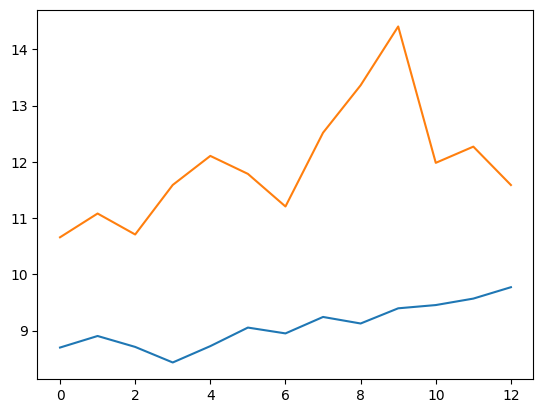

In [101]:
import matplotlib.pyplot as plt

plt.plot(prices['BLUE'])
plt.plot(prices['ORANGE'])

plt.show()

R=$\frac{a}{b}$


# Retornos Simples

R=$\frac{P_t - P_{t-1}}{P_{t-1}}$

In [102]:
retornos_d = prices.pct_change() #retornos simples
retornos_d

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [103]:
retornos_d.isna().sum()
retornos_d.dropna(inplace=True)

<Axes: >

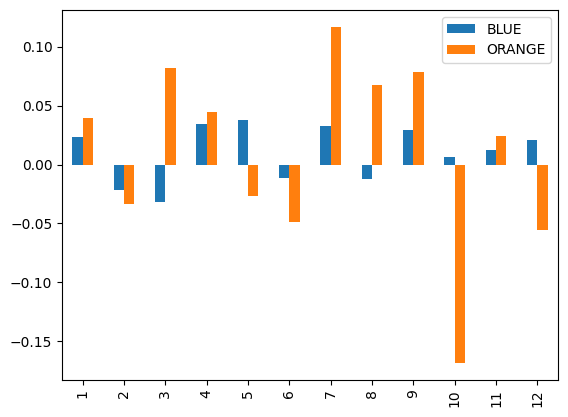

In [104]:
retornos_d.plot.bar()

In [105]:
(retornos_d+1).product()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [106]:
(((retornos_d+1).product()-1)*100).round(4)

BLUE      12.3310
ORANGE     8.7167
dtype: float64

**Retorno acumulado**

r_acu_d = $({\LARGE \Pi}_{i=1} ^{12} (1+R_i))-1$

In [107]:
r_acu_d=(retornos_d+1).product()
r_acu_d ##i think we have to subtract by 1, check with EXCEL!!!!!!

BLUE      1.123310
ORANGE    1.087167
dtype: float64

**Retorno (promedio) diario**

prom_d = $\sqrt[12]{{\LARGE \Pi}_{i=1} ^{12} (1+R_i)}$

In [108]:
#rendimiento diario promedio
prom_d = r_acu_d**(1/12)-1
prom_d

BLUE      0.009737
ORANGE    0.006989
dtype: float64

# **simple return formula**
-> (Pt / Pt-1) - 1
1 + Return Rt = Pt(tomorrow) - Pt-1(today) -> Gross return
**acumulado return** - multiplicar - (1+Rt).product() = Pt/P0 - el precio del ultimo dia / precio del primer dia

Simplificar la formula para acumular

In [109]:
prices.head(1)

,BLUE,ORANGE
0,8.7,10.66


In [110]:
prices.tail(1)

,BLUE,ORANGE
12,9.7728,11.5892


In [111]:
prices.iloc[-1]

BLUE       9.7728
ORANGE    11.5892
Name: 12, dtype: float64

In [112]:
prices.iloc[0]

BLUE       8.70
ORANGE    10.66
Name: 0, dtype: float64

In [113]:
prices.iloc[-1]/prices.iloc[0] -1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

# promedio diario simplificado

la bolsa esta abierta en promedio - 22 dias al mes

In [114]:
prom_mes = (prom_d+1)**22 - 1
prom_mes

BLUE      0.237607
ORANGE    0.165583
dtype: float64

In [115]:
prom_anual=(prom_d+1)**252 - 1
prom_anual

BLUE      10.494628
ORANGE     4.783907
dtype: float64

# retorno continuos

gross return (1+Rt)=Pt/Pt-1

logaritmo natural(1+Rt) = ln(Pt/Pt-1) = ln(Pt) - ln(Pt-1) => casi igual a Rt cuando es pequeño (menos que 1 mayor que 0) => Rt = ln(Pt) - ln(Pt-1) = aproximacion

vamos a compararlo con el retorno simple

In [116]:
import numpy as np
return_c = np.log(prices)
return_c

,BLUE,ORANGE
0,2.163323,2.366498
1,2.186669,2.405394
2,2.164621,2.371178
3,2.132342,2.450203
4,2.166238,2.493784
5,2.203328,2.467048
6,2.191810,2.416610
7,2.223964,2.527263
8,2.211303,2.592445
9,2.240454,2.667784


In [117]:
return_continuos = return_c.diff()
return_continuos

,BLUE,ORANGE
0,NaN,NaN
1,0.023346,0.038896
2,-0.022048,-0.034216
3,-0.032279,0.079025
4,0.033896,0.043581
5,0.037090,-0.026736
6,-0.011518,-0.050438
7,0.032154,0.110654
8,-0.012661,0.065181
9,0.029152,0.075339


the same as before but put together log and diff

In [143]:
return_c1 = np.log(prices).apply(lambda x: x.diff())
return_c1.dropna()

,BLUE,ORANGE
1,0.023346,0.038896
2,-0.022048,-0.034216
3,-0.032279,0.079025
4,0.033896,0.043581
5,0.037090,-0.026736
6,-0.011518,-0.050438
7,0.032154,0.110654
8,-0.012661,0.065181
9,0.029152,0.075339
10,0.006132,-0.184236


# Resumen toy example

Toy Example
promedio aritmetico de los retornos:
 BLUE      0.01
ORANGE    0.01
dtype: float64


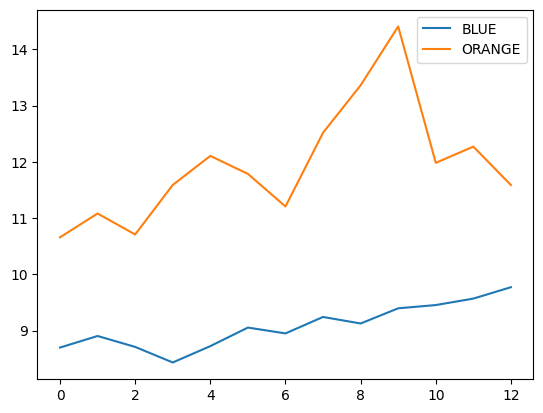

In [119]:
#grafica de los precios
prices.plot()

#titulo
l="Toy Example"

#media de los retornos
retornos_d.mean()
print(l + '\npromedio aritmetico de los retornos:\n',retornos_d.mean())

In [120]:
#desviacion estandar std
print(l + '\nstd:\n',retornos_d.std())

Toy Example
std:
 BLUE      0.023977
ORANGE    0.079601
dtype: float64


In [121]:
#rentabilidad acumulada en los 12 periodos
ra=(retornos_d+1).product()-1
print(l + '\nlos retornos acumulados:\n',ra*100)

Toy Example
los retornos acumulados:
 BLUE      12.331034
ORANGE     8.716698
dtype: float64


In [122]:
#rentabilidad diaria promedio
rpd=(ra+1)**(1/12)-1
print(l + '\nrentabilidad diaria promedio:\n',rpd*100)

Toy Example
rentabilidad diaria promedio:
 BLUE      0.973710
ORANGE    0.698891
dtype: float64


In [123]:
#rentabilidad diaria promedio
rpd=(ra+1)**(1/len(retornos_d))-1
print(l + '\nrentabilidad diaria promedio:\n',rpd*100)

Toy Example
rentabilidad diaria promedio:
 BLUE      0.973710
ORANGE    0.698891
dtype: float64


# NETFLIX

In [124]:
netflix_prices = pd.read_csv('/content/NFLX.csv')
netflix_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-05,506.799988,520.989990,501.700012,520.650024,520.650024,4088100
1,2020-10-06,518.719971,521.820007,504.160004,505.869995,505.869995,4199000
2,2020-10-07,518.000000,536.489990,515.820007,534.659973,534.659973,7988700
3,2020-10-08,533.479980,535.000000,524.150024,531.789978,531.789978,5386500
4,2020-10-09,537.830017,544.280029,535.000000,539.440002,539.440002,4781300



promedio aritmetico de los retornos:
 0.0008854296157676531

std:
 0.021685295426719584

los retornos acumulados:
 17.76625290235252

rentabilidad diaria promedio:
 0.06517324697501437


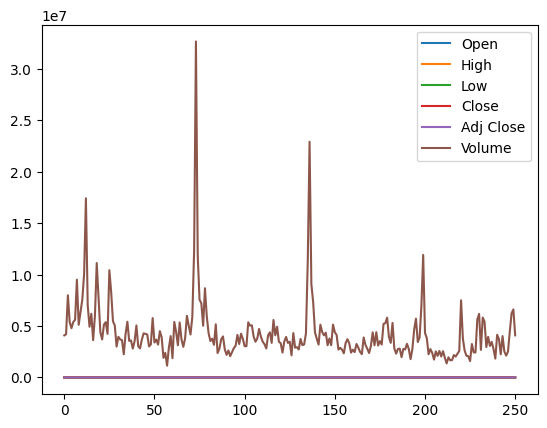

In [125]:
#grafica de los precios
netflix_prices.plot()

netflix_returns = netflix_prices['Adj Close'].pct_change()
#media de los retornos
print('\npromedio aritmetico de los retornos:\n',netflix_returns.mean())

#desviacion estandar std
print('\nstd:\n',netflix_returns.std())

#rentabilidad acumulada
ra1=(netflix_returns+1).product()-1
print( '\nlos retornos acumulados:\n',ra1*100)

#rentabilidad diaria promedio
rpd1=(ra1+1)**(1/len(netflix_returns))-1
print('\nrentabilidad diaria promedio:\n',rpd1*100)



In [126]:
netflix_prices.tail(1)/netflix_prices.head(1) - 1

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
import numpy as np
def ra(i):
    retur = (i+1).product()-1
    return retur

print(f"Rentabilidad acumulada: {ra(netflix_returns)*100:.4f}")

Rentabilidad acumulada: 17.7663


In [128]:
netflix_ret = netflix_prices['Adj Close']
netflix_returns = netflix_prices['Adj Close'].pct_change()
import numpy as np
def rpd_(i):
    ra1 = (i+1).product()-1
    n=len(i)
    rpd1 = (ra1+1)**(1/n)-1
    return rpd1

print(f"Rentabilidad Diaria Promedio: {rpd_(netflix_returns)*100:.4f}")

Rentabilidad Diaria Promedio: 0.0652


In [129]:
prom_mes_netflix = (rpd_(netflix_returns)+1)**22 - 1
prom_mes_netflix

0.014436660424572478

In [130]:
prom_anual_netflix=(rpd_(netflix_returns)+1)**252 - 1
prom_anual_netflix

0.17843004993207856

In [131]:
#from teacher
def acum_r(r):
    print((r+1).product()-1)

In [132]:
#from teacher
def acum_prom(r):
    ra=(r+1).product()-1
    n=ra.shape[0]
    rpd=(ra+1)**(1/n)-1
    print(ra, rpd)

In [133]:
acum_r(retornos_d)

BLUE      0.123310
ORANGE    0.087167
dtype: float64


In [134]:
acum_prom(retornos_d)

BLUE      0.123310
ORANGE    0.087167
dtype: float64 BLUE      0.059863
ORANGE    0.042673
dtype: float64


In [135]:
acum_r(netflix_returns)

0.1776625290235252


In [136]:
netflix_returns.isna().sum()
netflix_returns.dropna(inplace=True)

In [137]:
rpd_(retornos_d)

BLUE      0.009737
ORANGE    0.006989
dtype: float64

<Axes: >

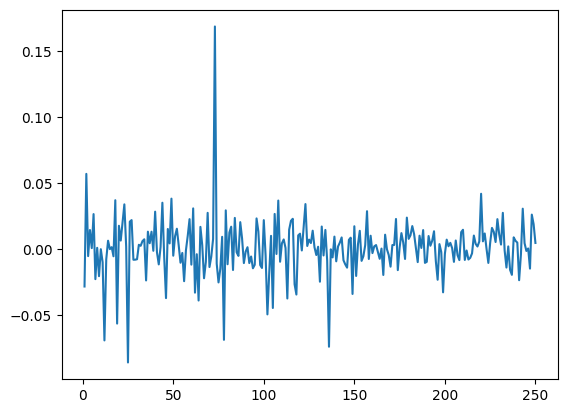

In [138]:
netflix_returns.plot()

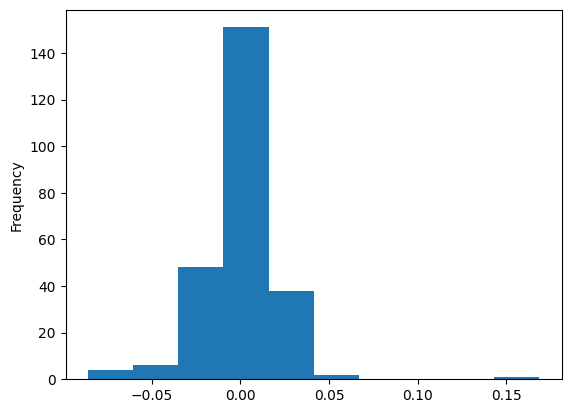

In [139]:
import matplotlib.pyplot as plt
import numpy as np

netflix_returns.plot.hist()
plt.show()

In [140]:
len(netflix_returns)

250

In [141]:
netflix_returns.shape[0]

250

In [142]:
ra(retornos_d)*100

BLUE      12.331034
ORANGE     8.716698
dtype: float64